# Data Analysis Notebook

In this notebook, we analyze the clean datasets in order to answer three primary questions:

- What movie genres generate the highest ROI?
- What time of year is best to release a movie?
- Which directors generate the highest grossings?

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, let's load the clean files we saved previously.

In [4]:
#load clean data sets
title_budgets_df = pd.read_csv('data/cleaned_title_budgets_df.csv', index_col=0)
directors_df = pd.read_csv('data/cleaned_directors_df.csv', index_col=0)

In [5]:
title_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,553.257713,Horror,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",154.667286,Action,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-57.210757,Action,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",324.384139,Action,May,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018


In [6]:
directors_df.head()

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category
12,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5.0,director
13,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,5.0,director
14,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,5.0,director
15,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,5.0,director
48,nm0064023,Bryan Beasley,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,2.0,director


## Further Data Cleaning

Before we start analyzing ROI, let's explore this column specifically and see if we need to do any further cleaning before proceeding.

In [138]:
title_budgets_df.shape

(2264, 13)

In [21]:
title_budgets_df['ROI'].describe()

count     2264.000000
mean       303.871589
std       1561.056298
min       -100.000000
25%        -62.645512
50%         68.272731
75%        273.978378
max      41556.474000
Name: ROI, dtype: float64

ROI has a standard deviation of 1,500 and a maximum value of ~41,000. The mean of 303 is significantly higher than the median of 68. Looking at these statistics, we may need to eliminate outliers at the right end of our data.

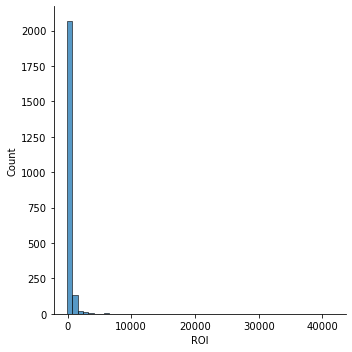

In [129]:
ax = sns.displot(data = title_budgets_df, x = 'ROI', bins=50);

The histogram confirms the data is skewed to the right. To make our analysis more useful, let's see what the data would look like eliminating all ROI values above 800.

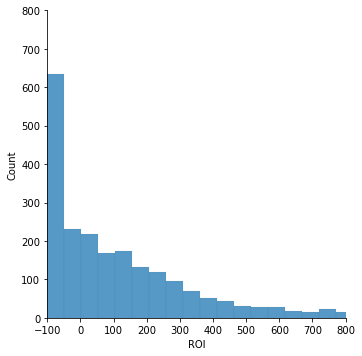

In [135]:
ax = sns.displot(data = title_budgets_df, x = 'ROI')
ax.set(ylim=(0,800), xlim=(-100,800));

The data is still skewed right, but less so. We will create a new DataFrame eliminating all rows with ROI above 800.

In [139]:
#create new dataframe of ROI values below 1000

filtered_title_budgets_df = title_budgets_df[title_budgets_df['ROI']< 800]
filtered_title_budgets_df.shape

(2092, 13)

By eliminating ROI values above 800, our dataset went from 2264 rows to 2092 rows, so we haven't lost too much of our overall data. Now that we have a cleaner ROI data set to work with, let's use this filtered_title_budgets_df to answer some of our questions.

### What genre generates the highest ROI?

The first question we would like to explore is how genre relates to a movie's ROI. To do this, we need to group the movies into genres and plot against ROI.

In [141]:
# group movies by primary_genre in a new dataframe, and sort by ROI.

genres_ROI_df = filtered_title_budgets_df.groupby(['primary_genre']).mean().reset_index()
genres_ROI_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
genres_ROI_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year
13,Mystery,2.839167e+07,5.949053e+07,1.226127e+08,109.000000,175.961107,2006.333333
2,Animation,4.545000e+07,7.557809e+07,1.840008e+08,87.500000,157.507089,2009.250000
12,Musical,4.020000e+07,7.501598e+07,1.910826e+08,118.000000,154.335363,2010.333333
1,Adventure,7.042513e+07,7.809399e+07,2.113264e+08,99.582888,143.202543,2012.080214
0,Action,7.228631e+07,7.565365e+07,2.075278e+08,110.202677,125.428328,2012.216061
4,Comedy,2.118552e+07,2.882085e+07,5.266644e+07,100.307895,107.176336,2011.468421
3,Biography,2.325659e+07,2.810920e+07,5.302302e+07,108.777778,106.192396,2012.748148
10,Horror,1.725617e+07,2.393017e+07,5.769715e+07,91.567308,103.062290,2010.942308
7,Drama,1.975926e+07,2.148143e+07,4.256714e+07,103.417431,87.908502,2009.077982
15,Sci-Fi,2.855636e+07,3.887608e+07,8.882676e+07,82.090909,86.432433,2004.272727


''

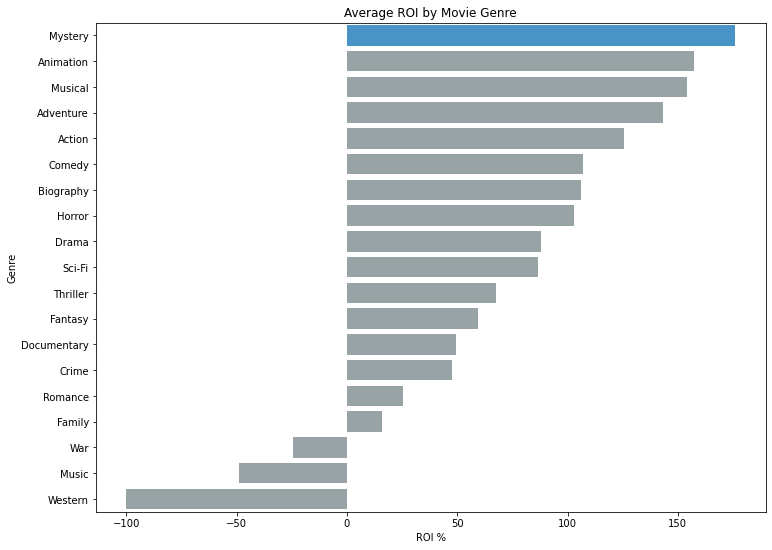

In [142]:
flatui = ["#3498db","#95a5a6", "#95a5a6","#95a5a6","#95a5a6","#95a5a6",
          "#95a5a6","#95a5a6","#95a5a6","#95a5a6","#95a5a6","#95a5a6",
          "#95a5a6","#95a5a6","#95a5a6","#95a5a6","#95a5a6","#95a5a6","#95a5a6"]

plt.figure(figsize=(12,9))
ax = sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=genres_ROI_df, 
            palette=flatui)
ax.set_title('Average ROI by Movie Genre')
ax.set(xlabel='ROI %', ylabel= 'Genre')
;

It looks like Mystery is the movie genre with the highest return on investment. Let's investigate the data a little more to check if this is a logical conclusion.

In [144]:
filtered_title_budgets_df['primary_genre'].value_counts()

Action         523
Drama          436
Comedy         380
Adventure      187
Biography      135
Documentary    127
Crime          117
Horror         104
Thriller        20
Animation       20
Sci-Fi          11
Fantasy          7
Family           7
Mystery          6
Romance          5
Musical          3
Music            2
War              1
Western          1
Name: primary_genre, dtype: int64

In [ ]:
filtered_title_budgets_df[filtered_title_budgets_df['primary_genre']=='Mystery']

There are only 6 mystery movies in our dataset, compared to action with over 500 movies. A handful of popular mystery movies are skewing that genre's overall average. Due to this, let's also analyze the 10 genres that appear most frequently.

In [146]:
## add a count column to determine which genres appear most frequently, and sort by the new count column.

genres_ROI_df['count'] = filtered_title_budgets_df.groupby(['primary_genre']).count().reset_index()['movie']
genres_ROI_df.sort_values(by = ['count'], ascending = False, inplace=True)
genres_ROI_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,count
0,Action,7.228631e+07,7.565365e+07,2.075278e+08,110.202677,125.428328,2012.216061,523
7,Drama,1.975926e+07,2.148143e+07,4.256714e+07,103.417431,87.908502,2009.077982,436
4,Comedy,2.118552e+07,2.882085e+07,5.266644e+07,100.307895,107.176336,2011.468421,380
1,Adventure,7.042513e+07,7.809399e+07,2.113264e+08,99.582888,143.202543,2012.080214,187
3,Biography,2.325659e+07,2.810920e+07,5.302302e+07,108.777778,106.192396,2012.748148,135
6,Documentary,1.895750e+07,2.020421e+07,3.750043e+07,74.062992,49.245743,2005.937008,127
5,Crime,2.277060e+07,2.239927e+07,4.743900e+07,106.811966,47.525977,2011.145299,117
10,Horror,1.725617e+07,2.393017e+07,5.769715e+07,91.567308,103.062290,2010.942308,104
2,Animation,4.545000e+07,7.557809e+07,1.840008e+08,87.500000,157.507089,2009.250000,20
16,Thriller,1.964000e+07,1.703294e+07,3.465570e+07,90.500000,67.768199,2005.050000,20


In [147]:
# create a dataframe with just the top 10 genres, then sort by ROI.
frequent_genres_df = genres_ROI_df[0:10]
frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
frequent_genres_df

<ipython-input-147-9bb0e9121d94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)


,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,count
2,Animation,4.545000e+07,7.557809e+07,1.840008e+08,87.500000,157.507089,2009.250000,20
1,Adventure,7.042513e+07,7.809399e+07,2.113264e+08,99.582888,143.202543,2012.080214,187
0,Action,7.228631e+07,7.565365e+07,2.075278e+08,110.202677,125.428328,2012.216061,523
4,Comedy,2.118552e+07,2.882085e+07,5.266644e+07,100.307895,107.176336,2011.468421,380
3,Biography,2.325659e+07,2.810920e+07,5.302302e+07,108.777778,106.192396,2012.748148,135
10,Horror,1.725617e+07,2.393017e+07,5.769715e+07,91.567308,103.062290,2010.942308,104
7,Drama,1.975926e+07,2.148143e+07,4.256714e+07,103.417431,87.908502,2009.077982,436
16,Thriller,1.964000e+07,1.703294e+07,3.465570e+07,90.500000,67.768199,2005.050000,20
6,Documentary,1.895750e+07,2.020421e+07,3.750043e+07,74.062992,49.245743,2005.937008,127
5,Crime,2.277060e+07,2.239927e+07,4.743900e+07,106.811966,47.525977,2011.145299,117


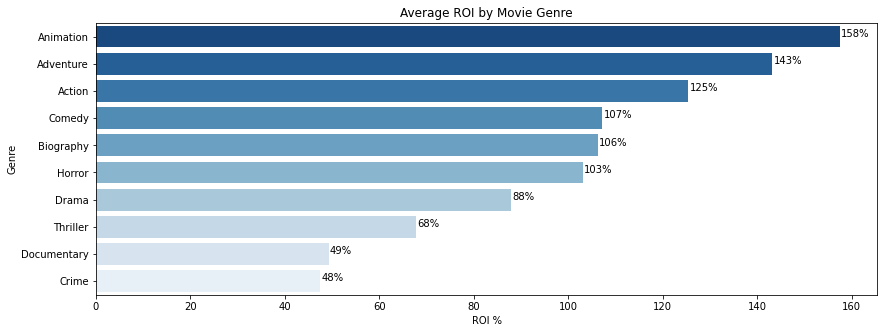

In [175]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=frequent_genres_df, 
            palette="Blues_r")
ax.set_title('Average ROI by Movie Genre')
ax.set(xlabel='ROI %', ylabel= 'Genre');

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = width+.25, 
            y = p.get_y()+(height/2),
            s = '{:.0f}%'.format(width)) 


Looking at the top 10 most frequent movie genres, animation films have the greatest ROI, followed closely by adventure films. How does this ranking compare to upfront investment required? 

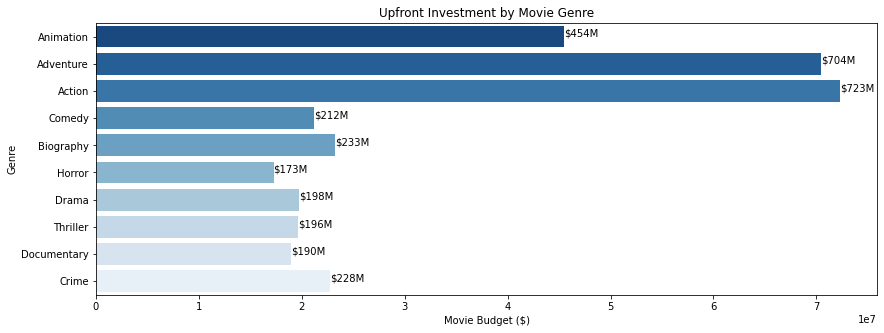

In [177]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x = 'production_budget', y = 'primary_genre', 
            data=frequent_genres_df, 
            palette="Blues_r")
ax.set_title('Upfront Investment by Movie Genre')
ax.set(xlabel='Movie Budget ($)', ylabel= 'Genre');

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = width+.25, 
            y = p.get_y()+(height/2),
            s = '${:.0f}M'.format(width/100000)) 


Animation films require much less upfront investment than the other top ROI genres, adventure and action. Therefore, we recommend Microsoft's studio begin making animation films.

### When is the best time to release a movie?

Next, we are interested in learning more about how ROI and grossings are affected by release date of the film. Let's start by finding which release month is most profitable.

In [191]:
filtered_title_budgets_df['release_month'].value_counts()

Dec    256
Oct    201
Mar    184
Apr    184
Sep    184
Aug    180
Nov    173
Jun    159
Jul    150
Feb    148
May    144
Jan    129
Name: release_month, dtype: int64

In [192]:
# create a new column for month number to sort months in descending order.
filtered_title_budgets_df["month_num"] = pd.to_datetime(filtered_title_budgets_df.release_month, format='%b', errors='coerce').dt.month


<ipython-input-192-26fb317ffb7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_title_budgets_df["month_num"] = pd.to_datetime(filtered_title_budgets_df.release_month, format='%b', errors='coerce').dt.month


In [193]:
# group the dataframe by release month

profit_by_month_df = filtered_title_budgets_df.groupby(['release_month']).mean().reset_index()
profit_by_month_df = profit_by_month_df.sort_values(by="month_num")
profit_by_month_df

,release_month,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,month_num
4,Jan,2.720826e+07,2.587425e+07,5.706133e+07,100.875969,110.644808,2010.713178,1.0
3,Feb,3.494750e+07,4.107793e+07,9.008738e+07,99.878378,121.977389,2011.270270,2.0
7,Mar,4.279714e+07,4.703567e+07,1.130330e+08,101.266304,104.621104,2011.918478,3.0
0,Apr,3.052571e+07,3.480128e+07,8.922995e+07,101.391304,93.638277,2010.701087,4.0
8,May,6.131851e+07,6.942791e+07,1.853831e+08,103.500000,126.362512,2011.083333,5.0
6,Jun,5.704132e+07,7.302182e+07,1.798744e+08,103.232704,137.335816,2010.213836,6.0
5,Jul,4.896570e+07,5.155646e+07,1.303844e+08,103.040000,108.637371,2010.500000,7.0
1,Aug,2.881456e+07,3.311626e+07,6.834995e+07,98.394444,104.705740,2009.716667,8.0
11,Sep,2.520479e+07,2.495705e+07,5.375493e+07,100.586957,89.195573,2011.059783,9.0
10,Oct,2.569769e+07,2.358996e+07,5.738069e+07,101.930348,69.576220,2010.184080,10.0


<Figure size 864x648 with 0 Axes>

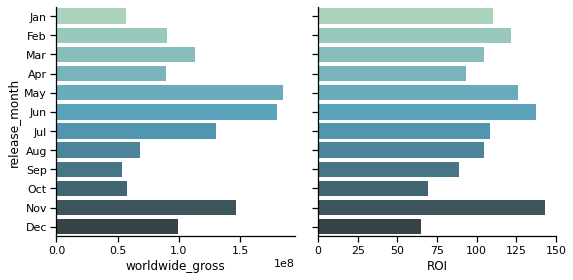

In [230]:
## Fix the colors and size on this graph
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(12,9))
g = sns.PairGrid(profit_by_month_df, y_vars=['release_month'], 
                 x_vars=['worldwide_gross', 'ROI'], height=4, palette='GnBu_d')
g.map(sns.barplot, color=".3");

Based on this analysis, it looks like the movie release month with the best ROI is November.

### Who are the highest grossing directors?

In order to figure out which directors brought in the most money, we will need to merge our two dataframes, directors_df and title_budgets_df.

In [195]:
## merge directors_df with title_budgets_df to get all title and budget information.

directors_title_budgets_df = directors_df.merge(title_budgets_df, how = 'left', left_on = 'tconst', right_on = 'tconst')
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length
0,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nm0064023,Bryan Beasley,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,2.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146449,nm9971456,Zheng Wei,director,NaN,tt8697720,1.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146450,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8715016,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146451,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8919136,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146452,nm9981679,Samir Eshra,"director,writer,cinematographer",NaN,tt8717234,1.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
directors_title_budgets_df.isna().sum()

nconst                     0
primary_name               0
primary_profession       587
known_for_titles        4207
tconst                     0
ordering                   0
category                   0
release_date          144089
movie                 144089
production_budget     144089
domestic_gross        144089
worldwide_gross       144089
runtime_minutes       144089
genres                144089
ROI                   144089
primary_genre         144089
release_month         144089
release_year          144089
movie_length          144089
dtype: int64

We can see there were 144,000 values in or directors_df that weren't able to match to a film in title_budgets_df. Let's drop all rows with missing values for worldwide_gross, since they won't be helpful for our analysis.

In [197]:
directors_title_budgets_df.dropna(subset=['worldwide_gross'], inplace=True)
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length
40,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt2023453,5.0,director,"Aug 3, 2012",Diary of a Wimpy Kid: Dog Days,22000000.0,49008662.0,77229695.0,94.0,"Comedy,Family",251.044068,Comedy,Aug,2012.0,normal
41,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt1650043,5.0,director,"Mar 25, 2011",Diary of a Wimpy Kid: Rodrick Rules,18000000.0,52698535.0,73695194.0,99.0,"Comedy,Family",309.417744,Comedy,Mar,2011.0,normal
42,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt6003368,5.0,director,"May 19, 2017",Diary of a Wimpy Kid: The Long Haul,22000000.0,20738724.0,35609577.0,91.0,"Comedy,Family",61.861714,Comedy,May,2017.0,normal
45,nm0103187,Dan Bradley,"stunts,assistant_director,actor","tt0244244,tt0440963,tt1229238,tt0372183",tt1234719,5.0,director,"Nov 21, 2012",Red Dawn,65000000.0,44806783.0,48164150.0,93.0,"Action,Sci-Fi,Thriller",-25.901308,Action,Nov,2012.0,normal
77,nm0135952,Nae Caranfil,"writer,director,actor","tt0839967,tt2017486,tt0314067,tt0175575",tt2017486,5.0,director,"Apr 17, 2014",Closer to the Moon,1500000.0,0.0,5396.0,112.0,"Comedy,Crime,Drama",-99.640267,Comedy,Apr,2014.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142829,nm7448856,Mauricio Hernandez,"producer,director,editor","tt4849322,tt8917508",tt4849322,1.0,director,"Oct 29, 2004",Birth,20000000.0,5005899.0,14603001.0,9.0,"Adventure,Documentary",-26.984995,Adventure,Oct,2004.0,short
143768,nm5862289,M.S. Sreenath,director,tt3107798,tt3107798,5.0,director,"Jan 25, 2008",Rambo,47500000.0,42754105.0,112214531.0,144.0,"Comedy,Drama,Thriller",136.241118,Comedy,Jan,2008.0,long
144209,nm8520144,Gudmund Sand,"director,writer,editor","tt6162064,tt6178382",tt6178382,1.0,director,"Dec 9, 1988",Twins,15000000.0,111936388.0,216600000.0,8.0,"Adventure,Biography,Comedy",1344.000000,Adventure,Dec,1988.0,short
145851,nm7372429,Andrius Blazevicius,"writer,director,editor","tt9348578,tt5846676,tt4744442,tt4738604",tt5846676,5.0,director,"Apr 4, 1997",The Saint,90000000.0,61363304.0,169400000.0,96.0,Drama,88.222222,Drama,Apr,1997.0,normal


Now that we have directors and their movie information in one place, there are two different ways of looking at the data. One way is to sort the DataFrame by worldwide_gross, and see who the directors are of the top movies. Or we can group the dataframe by director, and sum worldwide_gross to see which directors have made the most money overall.

**Method 1: Top Grossing Movies and their directors**

In [198]:
# sort dataFrame by worldwide_gross

directors_title_budgets_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length
91060,nm3786927,Atsushi Wada,director,"tt1594549,tt1775309,tt1602612",tt1775309,5.0,director,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,93.0,Horror,553.257713,Horror,Dec,2009.0,normal
10976,nm10047650,Ravi Punj,"director,writer,producer",tt8852130,tt8852130,5.0,director,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,115.0,Family,1004.104197,Family,Dec,1997.0,normal
977,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt4154756,6.0,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018.0,long
15489,nm0751577,Anthony Russo,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",tt4154756,5.0,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018.0,long
25273,nm1119880,Colin Trevorrow,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,124.0,"Action,Adventure,Sci-Fi",666.909239,Action,Jun,2015.0,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47707,nm2253409,Marçal Forés,"director,writer,assistant_director","tt1100091,tt1298530,tt4077768,tt0814402",tt1298530,5.0,director,"Dec 31, 2008",Animals,5500000.0,0.0,0.000000e+00,94.0,"Drama,Fantasy",-100.000000,Drama,Dec,2008.0,normal
99106,nm2978510,Steve Lickteig,"director,writer,assistant_director","tt1739304,tt0858494",tt1739304,1.0,director,"Mar 25, 2015",Open Secret,100000.0,0.0,0.000000e+00,55.0,Documentary,-100.000000,Documentary,Mar,2015.0,short
99595,nm3060795,Rick Montano,"writer,miscellaneous,director","tt3123250,tt7588054,tt0990414,tt7836468",tt3123250,5.0,director,"Dec 31, 2013",Paraphobia,30000.0,0.0,0.000000e+00,80.0,"Comedy,Horror,Thriller",-100.000000,Comedy,Dec,2013.0,short
47407,nm1358366,Andrew Hyatt,"miscellaneous,director,writer","tt7388562,tt4184744,tt2375443",tt2363439,5.0,director,"Dec 18, 2012",The Frozen,250000.0,0.0,0.000000e+00,95.0,"Drama,Thriller",-100.000000,Drama,Dec,2012.0,normal


<AxesSubplot:xlabel='primary_name', ylabel='worldwide_gross'>

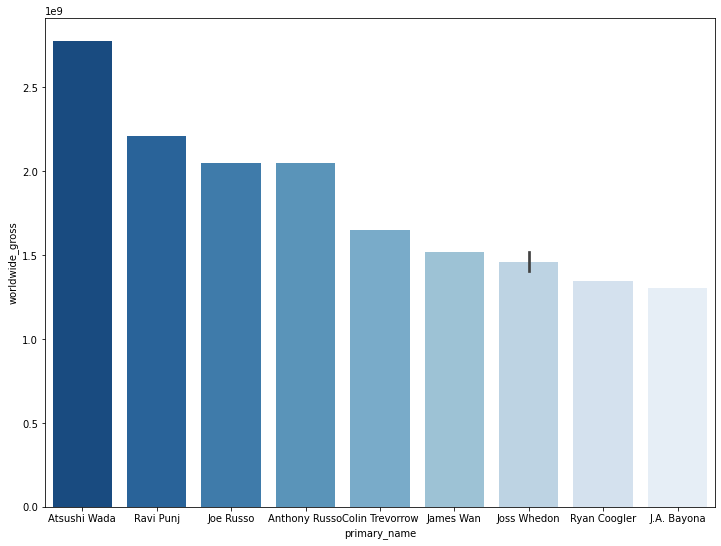

In [199]:
# plot worldwide_gross by top 10 directors
plt.figure(figsize=(12,9))
sns.barplot(x = 'primary_name', y = 'worldwide_gross', data = directors_title_budgets_df[0:10], palette = "Blues_r")


**Method 2: Top 10 Grossing Directors Overall**

In [200]:
sorted_directors_df = directors_title_budgets_df.groupby(['primary_name']).sum().reset_index()
sorted_directors_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)
sorted_directors_df

,primary_name,ordering,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year
103,Anthony Russo,15.0,720000000.0,1.346647e+09,3.902606e+09,432.0,1258.975570,6048.0
767,Joe Russo,18.0,720000000.0,1.346647e+09,3.902606e+09,432.0,1258.975570,6048.0
291,Christopher Nolan,20.0,750000000.0,1.118801e+09,3.086180e+09,587.0,1253.635592,8053.0
680,James Wan,20.0,371500000.0,8.794781e+08,3.083488e+09,495.0,9364.196708,8057.0
860,Joss Whedon,15.0,615600000.0,1.105671e+09,2.969535e+09,427.0,879.998009,6025.0
...,...,...,...,...,...,...,...,...
644,Jack Heller,5.0,500000.0,0.000000e+00,0.000000e+00,90.0,-100.000000,2012.0
1382,Robert Heath,5.0,1000000.0,0.000000e+00,0.000000e+00,96.0,-100.000000,2012.0
601,Hank Braxtan,5.0,3000000.0,0.000000e+00,0.000000e+00,89.0,-100.000000,2015.0
599,H.M. Coakley,5.0,750000.0,0.000000e+00,0.000000e+00,91.0,-100.000000,2016.0


<AxesSubplot:xlabel='primary_name', ylabel='worldwide_gross'>

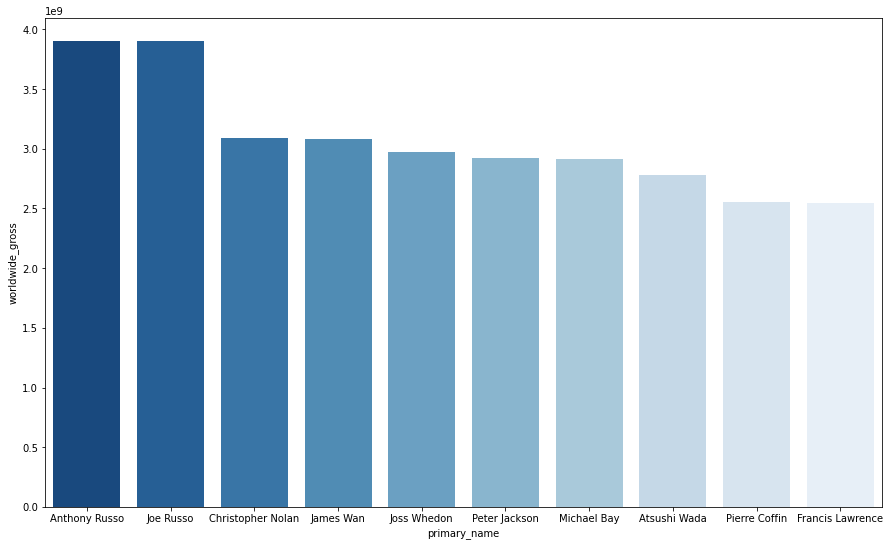

In [201]:
plt.figure(figsize=(15,9))
sns.barplot(x = 'primary_name', y = 'worldwide_gross', data = sorted_directors_df[0:10], palette = "Blues_r")

Now let's also look at what movies Anthony and Joe Russo have directed.

In [202]:
directors_title_budgets_df[directors_title_budgets_df['primary_name']=='Joe Russo']

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length
977,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt4154756,6.0,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018.0,long
975,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt3498820,6.0,director,"May 6, 2016",Captain America: Civil War,250000000.0,408084349.0,1.140069e+09,147.0,"Action,Adventure,Sci-Fi",356.027765,Action,May,2016.0,long
974,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt1843866,6.0,director,"Apr 4, 2014",Captain America: The Winter Soldier,170000000.0,259746958.0,7.144019e+08,136.0,"Action,Adventure,Sci-Fi",320.236405,Action,Apr,2014.0,long


Both directors directed action movies, specifically superhero franchises. We recommend Microsoft hires Anthony Russo, Joe Russo or Christopher Nolan to direct their films.

### Bonus Question: How does movie length affect ROI?

Another question we had was how movie length affects our profitability. Let's use a scatterplot to see if we can quickly see a relationship between ROI and runtime_minutes.

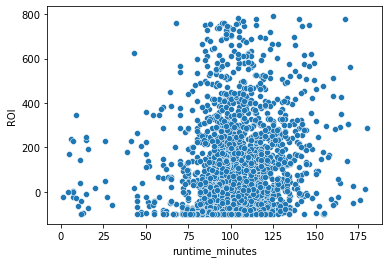

In [208]:
##plot runtime_minutes against ROI

ax = sns.scatterplot(data=filtered_title_budgets_df, x='runtime_minutes', y='ROI');

It's difficult to track any relationship between ROI and runtime minutes in this scatter plot. Let's see what happens if we run the same analysis after breaking run time into categories. We will run the describe method to see how we should break down our run time categories.

In [210]:
# run .describe() to determine categories of runtime_minutes data

filtered_title_budgets_df['runtime_minutes'].describe()

count    2092.000000
mean      101.923518
std        21.771165
min         1.000000
25%        90.000000
50%       101.000000
75%       113.000000
max       180.000000
Name: runtime_minutes, dtype: float64

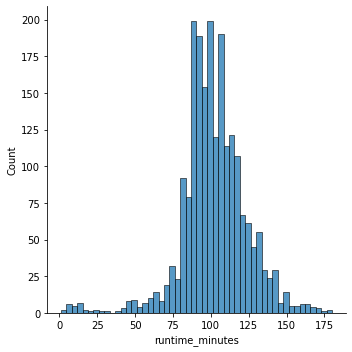

In [211]:
ax = sns.displot(data = filtered_title_budgets_df, x = 'runtime_minutes');

Based on the 25%-75% quartiles, we will categorize normal movie lengths as between 90 and 115 minutes. Anything shorter than 90 minutes will be categorized as 'short' and anything longer than 115 minutes will be categorized as 'long.

In [212]:
# create a function that categorizes each movie into movie lengths.

def movie_length_type(minutes):
    if (minutes < 90):
        return 'short'
    elif (minutes> 115):
        return 'long'
    else:
        return 'normal'

In [215]:
filtered_title_budgets_df['movie_length'] = filtered_title_budgets_df['runtime_minutes'].apply(movie_length_type)
filtered_title_budgets_df.head()

<ipython-input-215-fa03b4f16aa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_title_budgets_df['movie_length'] = filtered_title_budgets_df['runtime_minutes'].apply(movie_length_type)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,movie_length,month_num
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,553.257713,Horror,Dec,2009,normal,12
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",154.667286,Action,May,2011,long,5
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-57.210757,Action,Jun,2019,normal,6
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",324.384139,Action,May,2015,long,5
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018,long,4


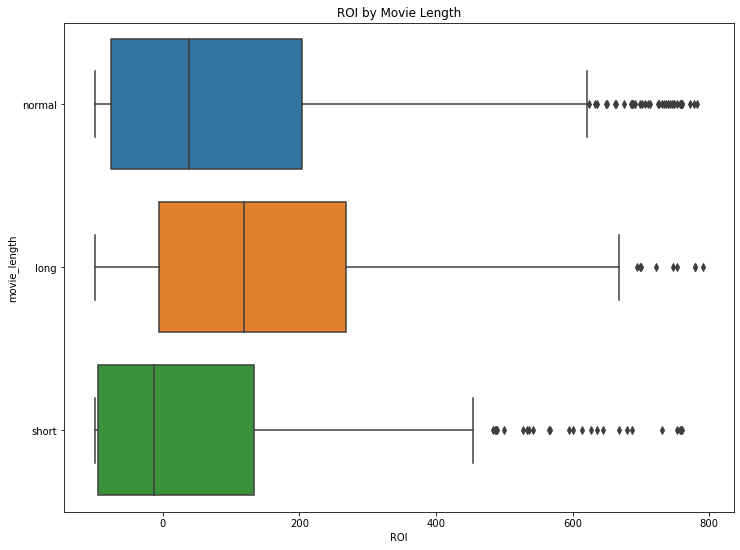

In [219]:
plt.figure(figsize=(12,9))
ax = sns.boxplot(data=filtered_title_budgets_df, x='ROI', y='movie_length')
ax.set_title('ROI by Movie Length');

In general, it looks like long movies perform slightly better from an ROI perspective, however, the evidence needs to be further investigated before a conclusion can be made.

<Figure size 864x648 with 0 Axes>

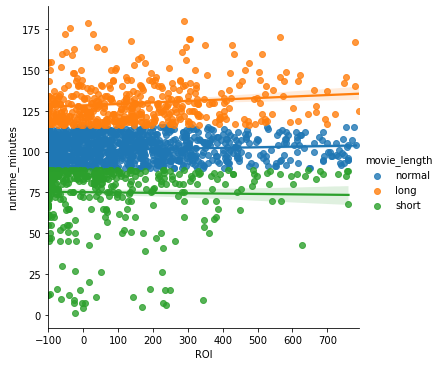

In [223]:
plt.figure(figsize=(12,9))
sns.lmplot(x='ROI', y='runtime_minutes', data=filtered_title_budgets_df,
          hue='movie_length');

In [ ]:
#b = sns.boxplot(x=tips["total_bill"])
# b.axes.set_title("Title",fontsize=50)
# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
# b.tick_params(labelsize=5)
# sns.plt.show()